In [5]:
import json
from chronos import ChronosPipeline
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt


def get_historical_data(stock, df):
    
    file = open('../data/historical/{}.json'.format(stock), 'r')
    resp = json.loads(file.read())

    dfbuf = pd.DataFrame(resp['historical'])
    dfbuf['date'] = pd.to_datetime(dfbuf['date'])
    dfbuf = dfbuf.set_index('date')
    dfbuf = dfbuf.sort_index()

    df[resp['symbol']] = dfbuf['close']

In [6]:
dfblub = pd.DataFrame()
get_historical_data(stock="AMZN", df=dfblub)

In [7]:
dfblub.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6552 entries, 1997-05-15 to 2023-05-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    6552 non-null   float64
dtypes: float64(1)
memory usage: 102.4 KB


Start MMM
MMM -12.991643897407
Start AOS
AOS 0.1096298610517823
Start ABT
ABT 0.0010296602938529853
Start ABBV
ABBV -0.7809606669393558
Start ACN
ACN -0.4199980432864705
Start ADBE
ADBE -2.3735921718036637
Start AMD
AMD -2.3088312504707793
Start AES
AES -1.759601005323142
Start AFL
AFL -0.03158930665535875
Start A
A -3.8390177977615503
Start APD
APD -5.832717475574745
Start ABNB


KeyboardInterrupt: 

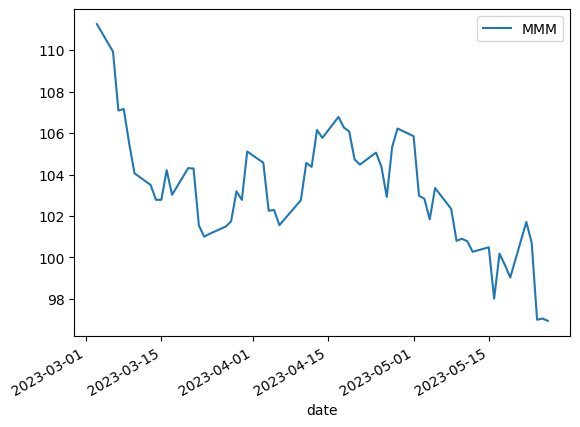

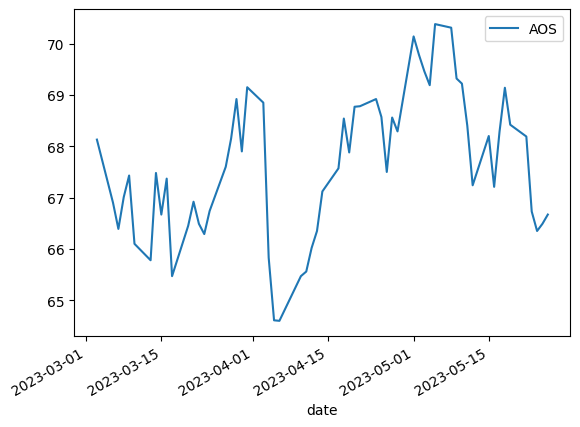

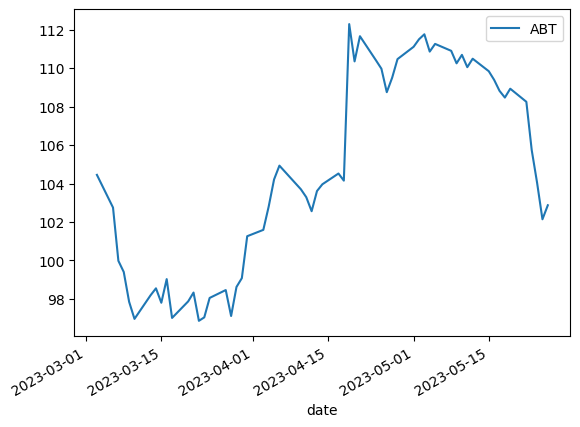

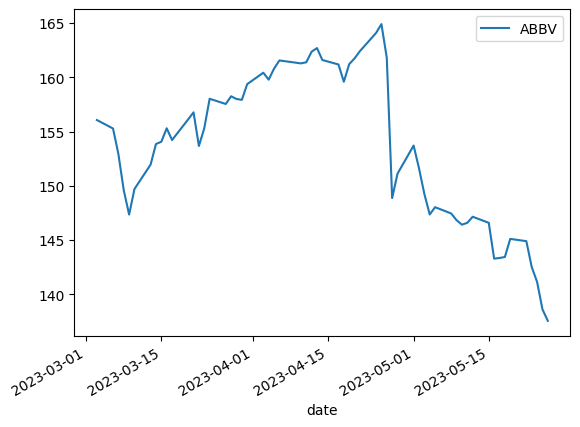

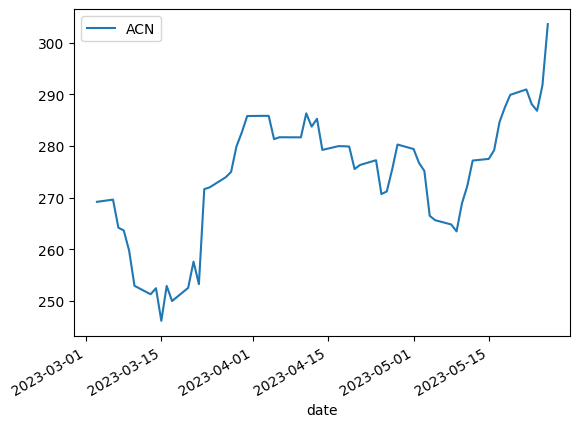

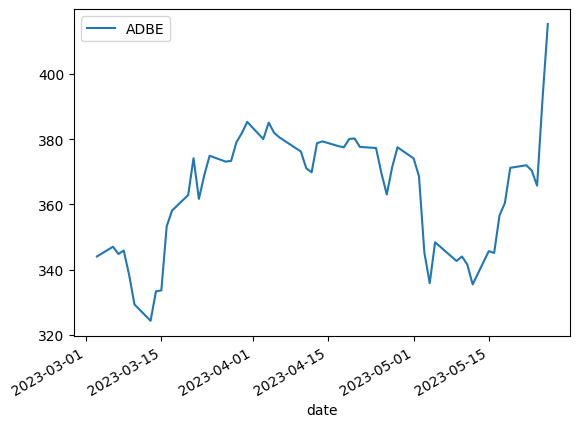

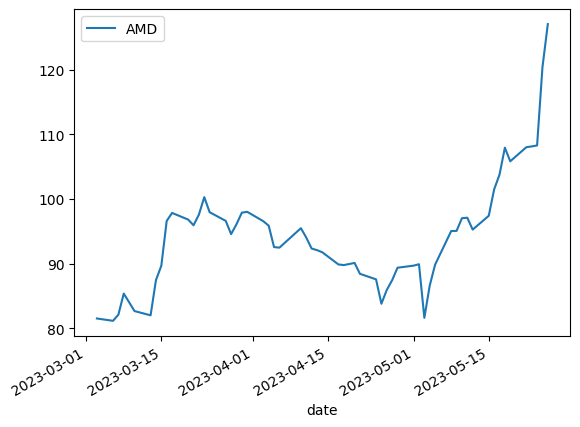

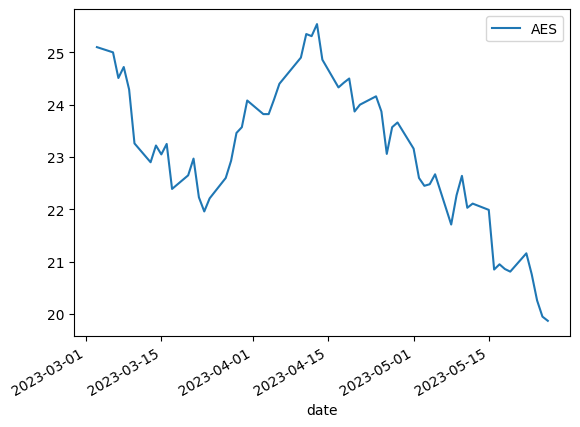

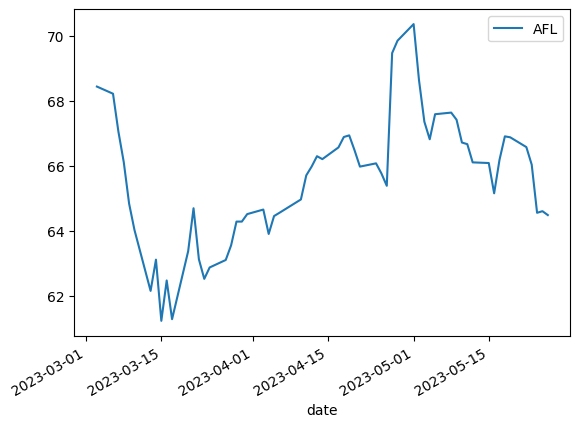

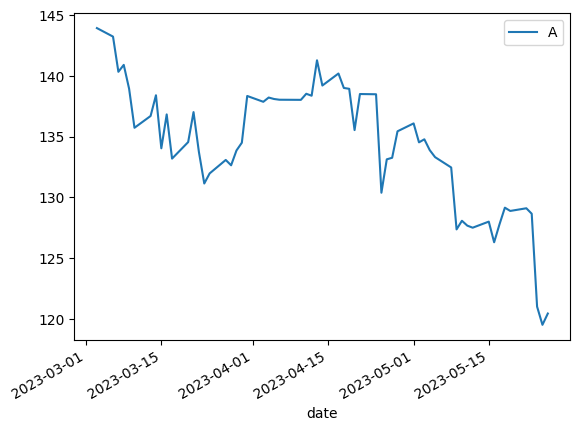

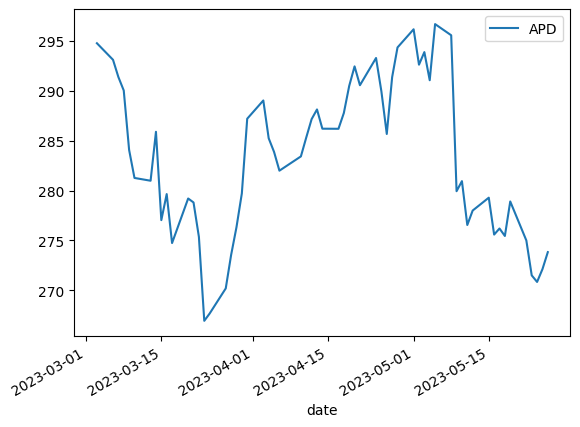

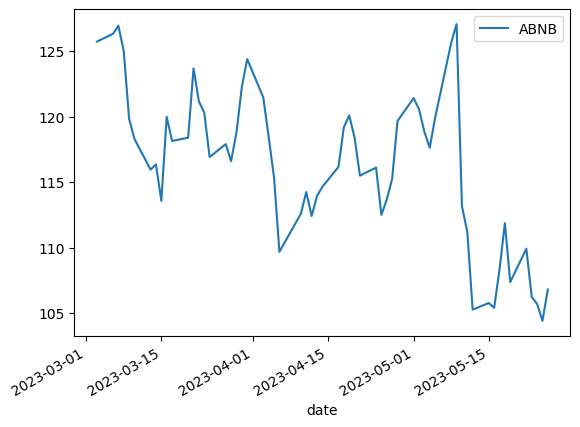

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-base",
  device_map="cpu",
  torch_dtype=torch.bfloat16,
)

sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500_list = np.array(sp500[0]['Symbol'])

for stock in sp500_list:
#df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")
  print(f"Start {stock}")
  df = pd.DataFrame()

  data = get_historical_data(stock=stock, df=df)

  train_size = len(df) - 60
  train_df = df[:train_size]
  test_df = df[train_size:]


  context = torch.tensor(train_df[stock].values)
  forecast = pipeline.predict(context, len(test_df))  # shape [num_series, num_samples, prediction_length]

  # visualize the forecast
  forecast_index = range(len(test_df))
  low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)



  print(stock, r2_score(test_df[stock].to_list(), median))

In [ ]:
df.plot()

In [ ]:
#df = df.rolling(30).mean().dropna()

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(test_df[stock].to_numpy(), color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()